In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

# Download latest version
path = kagglehub.dataset_download("kolawale/focusing-on-mobile-app-or-website")

print("Path to dataset files:", path)

100%|██████████| 43.1k/43.1k [00:00<00:00, 19.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kolawale/focusing-on-mobile-app-or-website/versions/1


In [9]:
df = pd.read_csv(path+"/Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


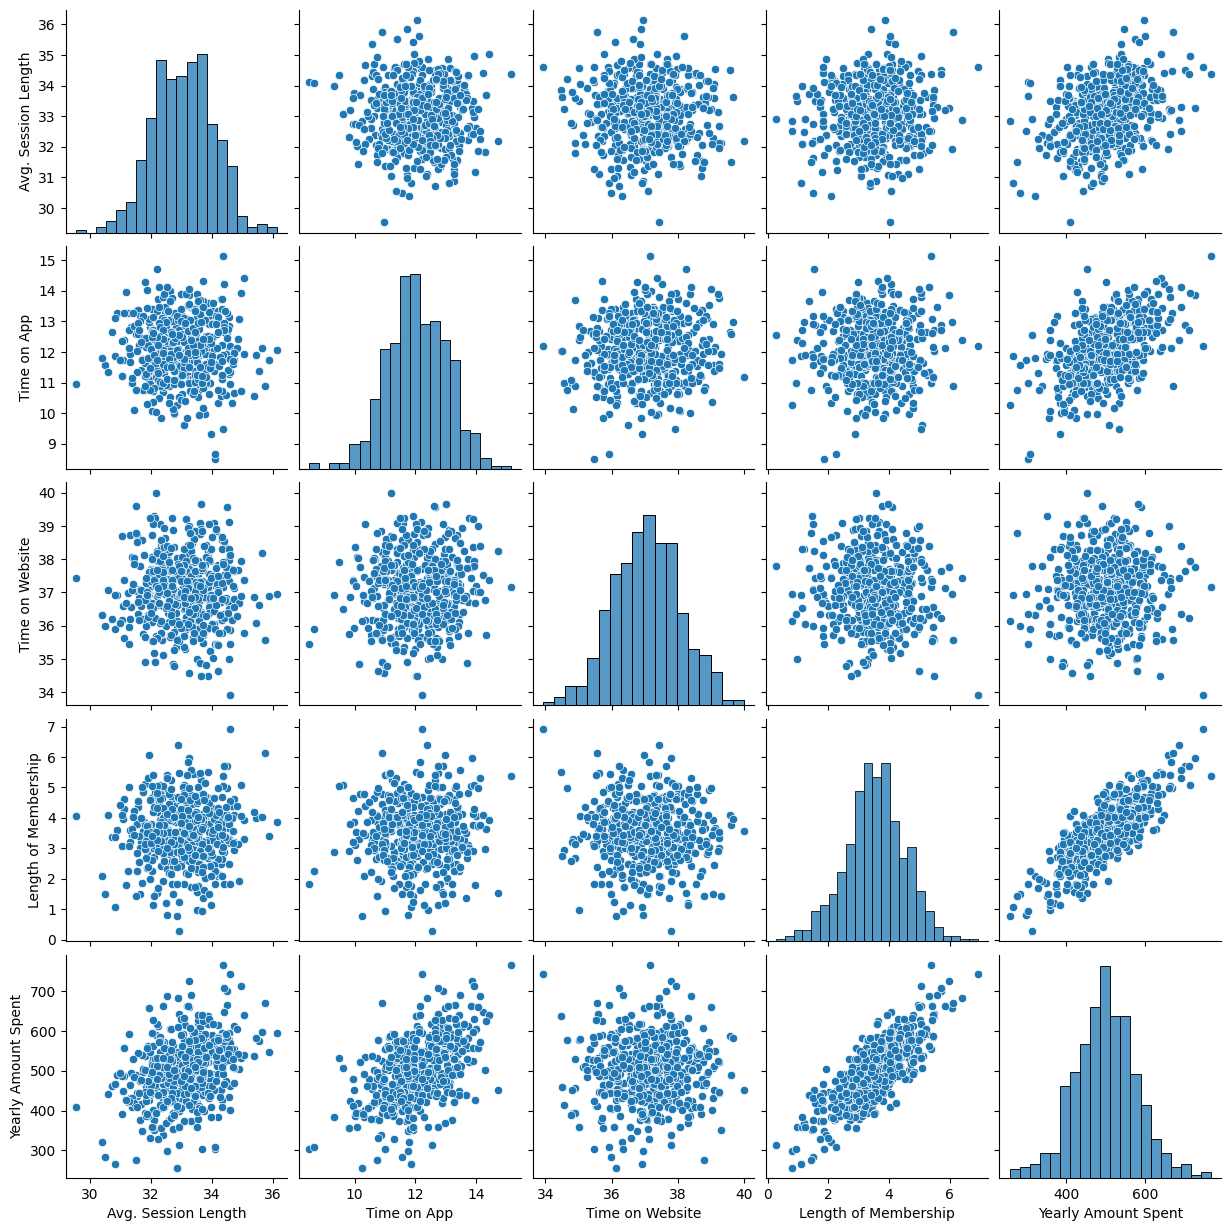

In [21]:
sns.pairplot(data=df)


In [26]:
from sklearn.model_selection import train_test_split
x = df[["Length of Membership", "Time on App"]]
y = df["Yearly Amount Spent"]

In [27]:
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=0.25, random_state=42)

In [29]:
X_test

,Length of Membership,Time on App
361,3.434560,10.347877
73,3.851579,12.817113
374,4.238296,10.101632
155,2.941411,13.457725
104,3.428860,10.994224
...,...,...
220,3.678589,11.591872
176,4.773503,11.548761
320,1.200484,12.968326
153,6.076654,12.965761


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [33]:
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
lm.coef_

array([62.84122762, 38.32756926])

In [36]:
cdf = pd.DataFrame(lm.coef_, x.columns, columns=["Coeff"])
print(cdf)

                          Coeff
Length of Membership  62.841228
Time on App           38.327569


In [37]:
predictions = lm.predict(X_test)

In [38]:
predictions

array([427.88689968, 548.73270983, 468.95672352, 516.08972754,
       452.30162448, 584.80949558, 480.93526556, 507.16705569,
       423.45487751, 475.44428359, 469.52106589, 413.23461762,
       429.00598877, 487.97018017, 446.81285461, 409.77657193,
       570.84314722, 479.52570725, 443.52581443, 483.53996651,
       459.16319935, 480.23202728, 526.24281906, 631.10334473,
       436.53903823, 504.82395833, 567.77380362, 529.14754021,
       428.66331817, 351.97821559, 514.55190725, 496.58364742,
       497.09870021, 316.07621228, 507.64253071, 472.57555799,
       545.19011523, 434.59565154, 468.44385157, 477.31445225,
       480.79244103, 424.8146627 , 500.5189096 , 514.12899097,
       494.92826122, 534.57768672, 557.06321849, 492.80517756,
       317.07198505, 469.30161492, 438.33534026, 494.07730206,
       600.83154782, 603.15933318, 602.77100211, 472.77159031,
       401.48244722, 474.75448663, 535.19839567, 511.96075541,
       501.14129582, 402.52244857, 487.81151408, 466.15

Text(0.5, 1.0, 'Evaluation Of Our Model')

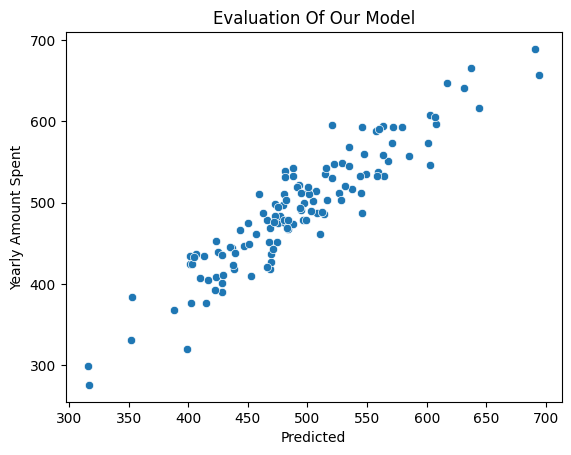

In [42]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predicted")
plt.title("Evaluation Of Our Model")

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [45]:
print("Mean Absolute Error", mean_absolute_error(y_test, predictions))
print("Mean Squared Error", mean_squared_error(y_test, predictions))


Mean Absolute Error 22.260447028502018
Mean Squared Error 740.1174929327858


In [46]:
residuals = y_test - predictions

/tmp/ipython-input-2119670294.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

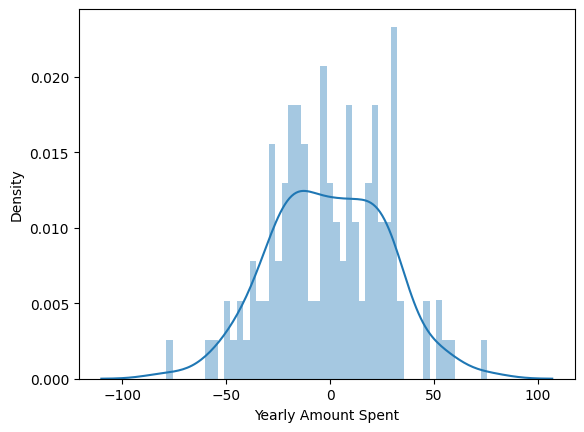

In [49]:
sns.distplot(residuals, bins=50)